<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'x1': [0,0,1,0,1,1,0],
        'x2': [0,1,0,1,0,1,0],
        'x3': [1,1,1,0,0,1,0]}
df = pd.DataFrame.from_dict(data).astype('int')
corr = [[0],[1],[1],[1],[1],[0],[0]]

In [3]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes = 7
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)

         # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [4]:
X = df.values

In [5]:
# Train my 'net
nn = NeuralNetwork()
y = corr

# Number of Epochs / Iterations
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)
    
    
    ''' 
    Shoutout the lecture code, just had to tweak a few parameters and it was highly accurate 
    with this first problem. 
    '''

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.92927604]
 [0.94966631]
 [0.94769783]
 [0.92195473]
 [0.91992357]
 [0.9614974 ]
 [0.88855921]]
Loss: 
 0.37076299470284246
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.89391633]
 [0.91918156]
 [0.91636813]
 [0.88621071]
 [0.88327681]
 [0.93473494]
 [0.84924632]]
Loss: 
 0.34773333500873427
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output: 
 [[0], [1], [1], [1], [1], [0], [0]]
Predicted Output: 
 [[0.82676356]
 [0.85611219]
 [0.85194521]
 [0.81988931]
 [0.81539426]
 [0.87538444]
 [0.78237827]]
Loss: 
 0.31015638856846756
+---------EPOCH 4---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 

## Try building/training a more complex MLP on a bigger dataset.
Use the MNIST dataset to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve.

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.

### Parts
1 Gathering & Transforming the Data

2 Making MNIST a Binary Problem

3 Estimating your Neural Network (the part you focus on)

### Gathering the Data
keras has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row.

Doing 2D matrix is possible w/ NN but gross, reshape and make a vector

In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
# input image dimensions
img_rows, img_cols = 28, 28

In [8]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [10]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [11]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [12]:
y_train = np.array([y_train]).T
y_train

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [13]:
class NeuralNetwork2:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 28*28
        self.hiddenNodes = 20
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)

         # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)



In [14]:
nn = NeuralNetwork2()

# Number of Epochs / Iterations
for i in range(50):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', x_train)
        print('Actual Output: \n', y_train)
        print('Predicted Output: \n', str(nn.feed_forward(x_train)))
        print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(x_train)))))
    nn.train(x_train,y_train)

+---------EPOCH 1---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.99998718]
 [0.99998718]
 [0.99998718]
 ...
 [0.99998718]
 [0.99998718]
 [0.99998718]]
Loss: 
 0.901260227831574
+---------EPOCH 2---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.06924192]
 [0.06924192]
 [0.06924192]
 ...
 [0.06924192]
 [0.06924192]
 [0.06924192]]
Loss: 
 0.08984044747055439
+---------EPOCH 3---------+
Input: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]


### Estimating Your `net

In [15]:
class TwoLayerNetwork(object):
    def __init__(self, input_dim=28*28, hidden_dim=100, output_dim=10, iterations=20):
        self.iterations=iterations
        self.weight1=np.random.randn(input_dim, hidden_dim)
        self.bias1=np.zeros(hidden_dim)
        self.weight2=np.random.randn(hidden_dim, output_dim)
        self.bias2=np.zeros(output_dim)
        self.loss = []
        pass
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def derivative_sigmoid(self, x):
        sx = self.sigmoid(x)
        return sx * (1-sx)
    
    def forward(self, x):
        ''' First Layer '''
        a1 = x.dot(self.weight1) + self.bias1
        output1 = self.sigmoid(a1)
        
        ''' Second Layer '''
        a2 = output1.dot(self.weight2) + self.bias2
        output2 = np.exp(a2) / np.sum(np.exp(a2), axis = 0)
        
        return (a1, output1, a2, output2)
    
    def backward(self, x, y, cache):
        a1, output1, a2, output2 = cache
        m = x.shape[0]
        loss = output2 - y
        
        dweight2 = output1.T.dot(loss) / m
        dbias2 = np.sum(loss, axis=0) / m
        da2 - loss.dot(self.weight2.T)
        
        doutput1 = da2 * self.derivative_sigmoid(output1)
        dweight1 = x.T.dot(output1) / m
        dbias1 = np.sum(doutput1, axis=0) / m
        return dweight1, dbias1, dweight2, dbias2
    
    def fit(self, x, y):
        for i in range(self.iterations):
            m = x.shape[0]
            z1 = x.dot(self.weight1)

In [17]:
pip install keras

     |████████████████████████████████| 378kB 2.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
''' Keras Implementation '''
import numpy as np 
np.random.seed(69)
''' Model Module '''
from keras.models import Sequential
''' Core Layers '''
from keras.layers import Dense, Dropout, Activation, Flatten
''' CNN Layers '''
from keras.layers import Convolution2D, MaxPooling2D
''' Utilities '''
from keras.utils import np_utils
''' TensorFlow for MNIST data '''
from keras.datasets import mnist

Using TensorFlow backend.


In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

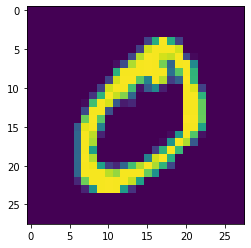

In [25]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1])

In [26]:
X_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
X_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

X_train.shape

(60000, 1, 28, 28)

In [27]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [28]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [30]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [40]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # This regularizes the modedesl to prevent overfitting
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?